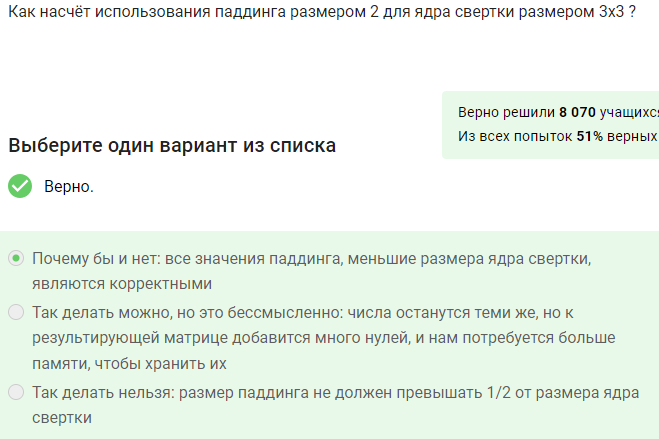

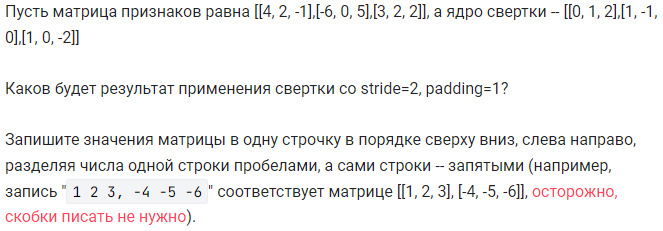

-4 3, -9 5

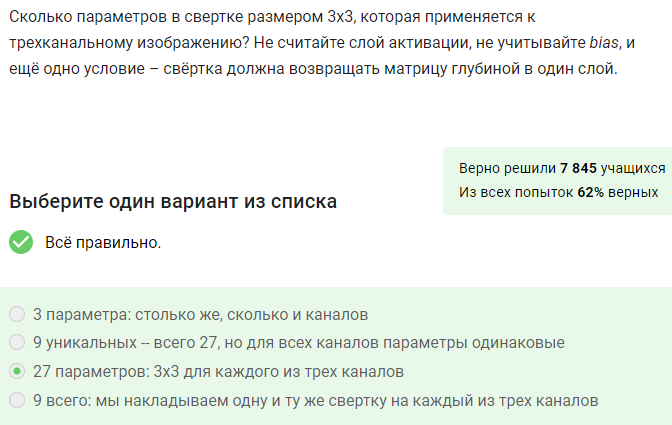

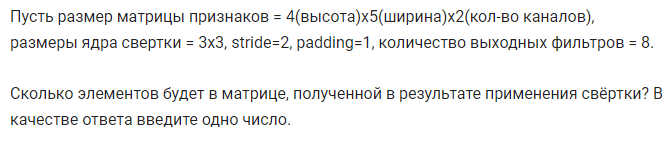

48

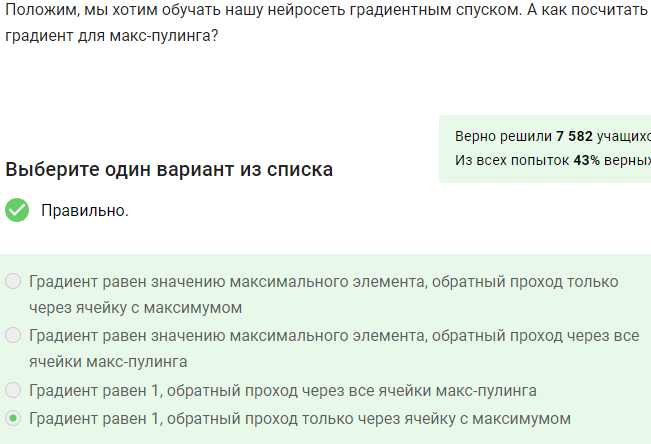

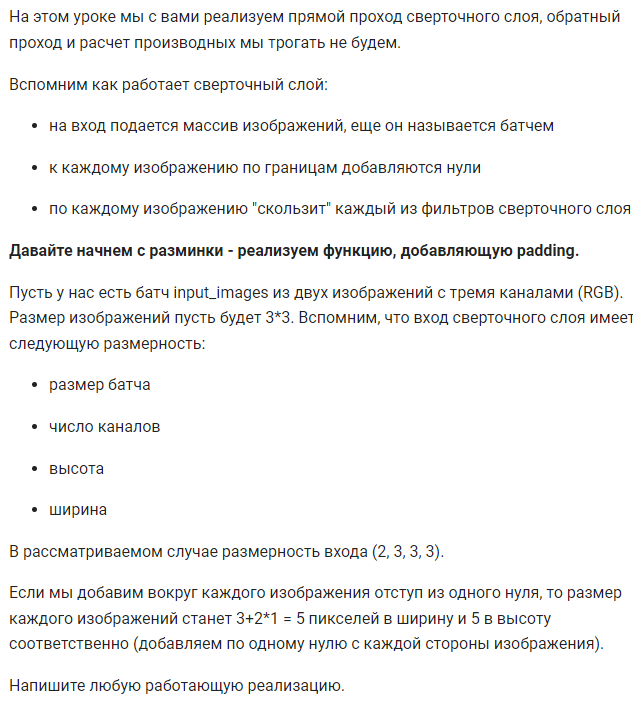

In [1]:
import torch
import torch.nn.functional as F
# Создаем входной массив из двух изображений RGB 3*3
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])


def get_padding2d(input_images):
    padded_images = F.pad(input_images, (1, 1, 1, 1), value=0) # добавить нулей с четырех сторон каждого изображения
    return padded_images


correct_padded_images = torch.tensor(
       [[[[0.,  0.,  0.,  0.,  0.],
          [0.,  0.,  1.,  2.,  0.],
          [0.,  3.,  4.,  5.,  0.],
          [0.,  6.,  7.,  8.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0.,  9., 10., 11.,  0.],
          [0., 12., 13., 14.,  0.],
          [0., 15., 16., 17.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 18., 19., 20.,  0.],
          [0., 21., 22., 23.,  0.],
          [0., 24., 25., 26.,  0.],
          [0.,  0.,  0.,  0.,  0.]]],


        [[[0.,  0.,  0.,  0.,  0.],
          [0., 27., 28., 29.,  0.],
          [0., 30., 31., 32.,  0.],
          [0., 33., 34., 35.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 36., 37., 38.,  0.],
          [0., 39., 40., 41.,  0.],
          [0., 42., 43., 44.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 45., 46., 47.,  0.],
          [0., 48., 49., 50.,  0.],
          [0., 51., 52., 53.,  0.],
          [0.,  0.,  0.,  0.,  0.]]]])
input_images = input_images.float()
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
#print(torch.allclose(get_padding2d(input_images), correct_padded_images))

ModuleNotFoundError: No module named 'torch'

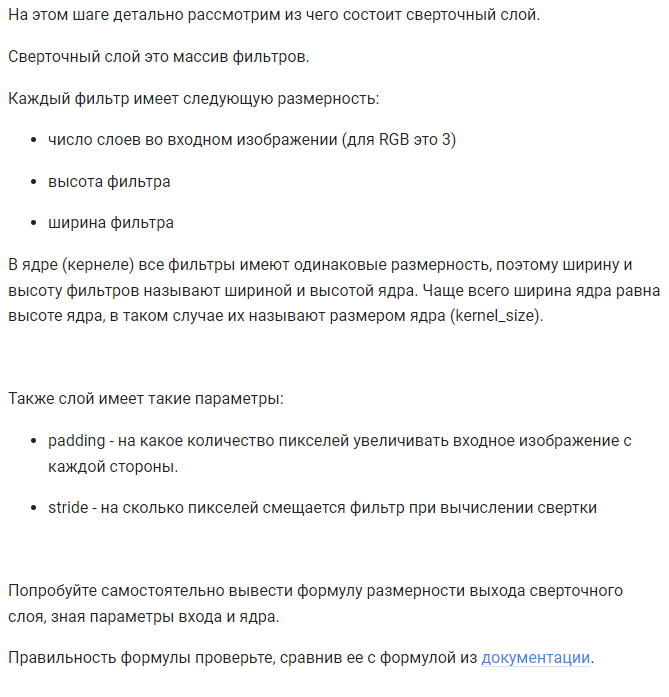

In [2]:
import numpy as np


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    out_shape =  [
    input_matrix_shape[0],  # batch size remains the same
    out_channels,  # number of output channels
    (input_matrix_shape[2] - kernel_size + 2 * padding) // stride + 1,  # height of the output feature map
    (input_matrix_shape[3] - kernel_size + 2 * padding) // stride + 1  # width of the output feature map
] # напишите тут код, вычисляющий выходную размерность

    return out_shape

print(np.array_equal(
    calc_out_shape(input_matrix_shape=[2, 3, 10, 10],
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=0),
    [2, 10, 8, 8]))

# ... и ещё несколько подобных кейсов

True


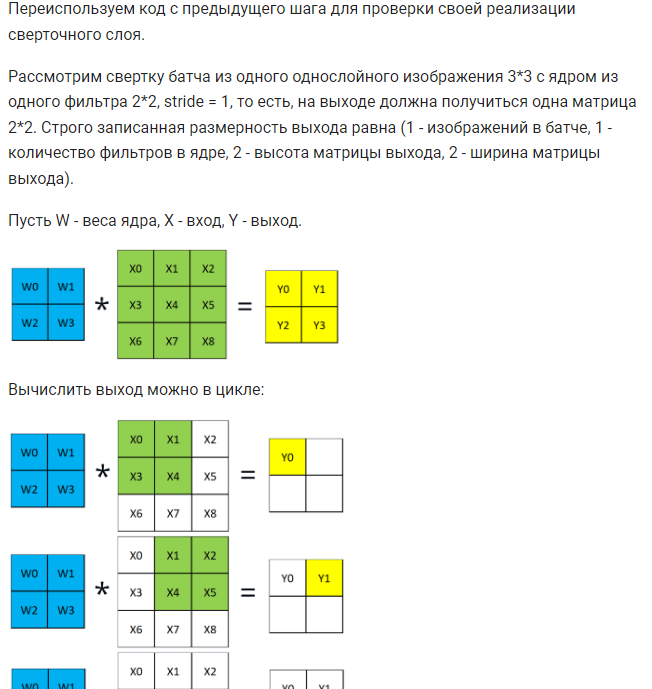

In [3]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


# Сверточный слой через циклы.
class Conv2dLoop(ABCConv2d):
    def __call__(self, input_tensor):
        batch_size, in_channels, input_height, input_width = input_tensor.shape
        out_channels = self.out_channels
        kernel_size = self.kernel_size
        stride = self.stride
        padding = 0  # Assuming no padding for simplicity

        output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

        output_tensor = torch.zeros(batch_size, out_channels, output_height, output_width)

        for b in range(batch_size):
            for c_out in range(out_channels):
                for h_out in range(output_height):
                    for w_out in range(output_width):
                        h_start = h_out * stride
                        w_start = w_out * stride
                        h_end = h_start + kernel_size
                        w_end = w_start + kernel_size

                        output_tensor[b, c_out, h_out, w_out] = torch.sum(
                            input_tensor[b, :, h_start:h_end, w_start:w_end] * self.kernel[c_out]
                        )

        return output_tensor

# Корректность реализации определится в сравнении со стандартным слоем из pytorch.
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# print(test_conv2d_layer(Conv2dLoop))

ModuleNotFoundError: No module named 'torch'

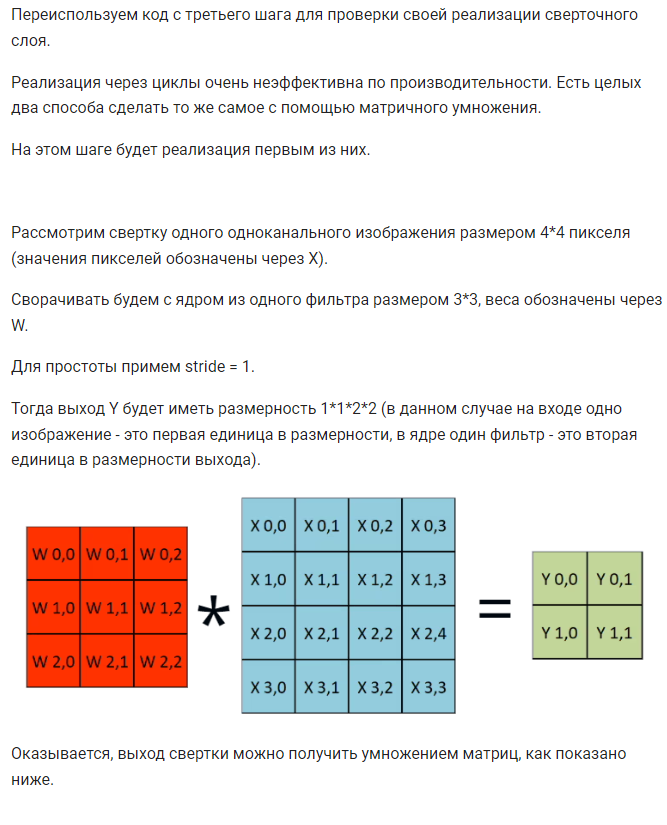

In [4]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


# Сверточный слой через циклы.
class Conv2dMatrix(ABCConv2d):
    def __call__(self, input_tensor):
        batch_size, in_channels, input_height, input_width = input_tensor.shape
        out_channels = self.out_channels
        kernel_size = self.kernel_size
        stride = self.stride
        padding = 0  # Assuming no padding for simplicity

        output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

        output_tensor = torch.zeros(batch_size, out_channels, output_height, output_width)

        for b in range(batch_size):
            for c_out in range(out_channels):
                for h_out in range(output_height):
                    for w_out in range(output_width):
                        h_start = h_out * stride
                        w_start = w_out * stride
                        h_end = h_start + kernel_size
                        w_end = w_start + kernel_size

                        output_tensor[b, c_out, h_out, w_out] = torch.sum(
                            input_tensor[b, :, h_start:h_end, w_start:w_end] * self.kernel[c_out]
                        )

        return output_tensor
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
#print(test_conv2d_layer(Conv2dMatrix))

ModuleNotFoundError: No module named 'torch'

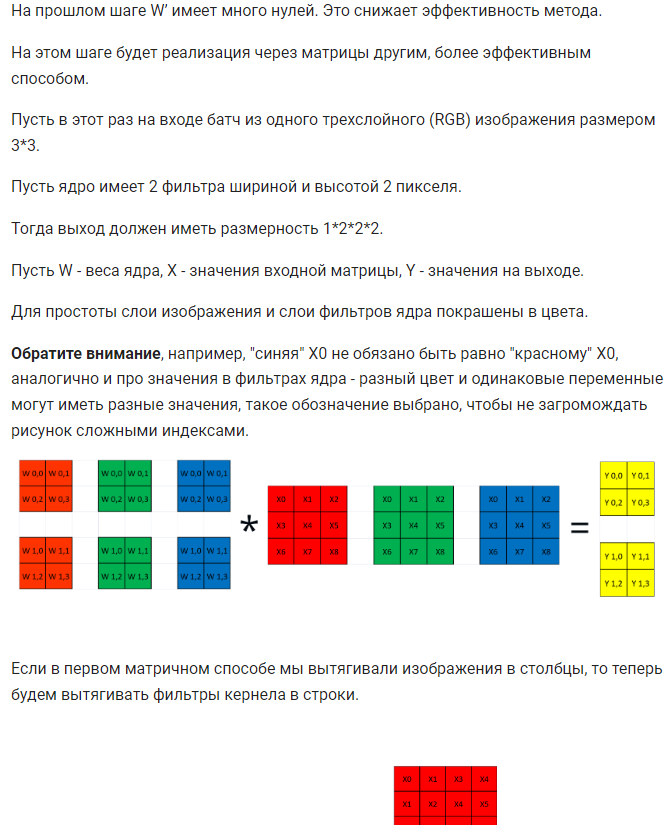

In [5]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


# Сверточный слой через циклы.
class Conv2dMatrixV2(ABCConv2d):
    def __call__(self, input_tensor):
        batch_size, in_channels, input_height, input_width = input_tensor.shape
        out_channels = self.out_channels
        kernel_size = self.kernel_size
        stride = self.stride
        padding = 0  # Assuming no padding for simplicity

        output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
        output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

        output_tensor = torch.zeros(batch_size, out_channels, output_height, output_width)

        for b in range(batch_size):
            for c_out in range(out_channels):
                for h_out in range(output_height):
                    for w_out in range(output_width):
                        h_start = h_out * stride
                        w_start = w_out * stride
                        h_end = h_start + kernel_size
                        w_end = w_start + kernel_size

                        output_tensor[b, c_out, h_out, w_out] = torch.sum(
                            input_tensor[b, :, h_start:h_end, w_start:w_end] * self.kernel[c_out]
                        )

        return output_tensor
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# print(test_conv2d_layer(Conv2dMatrixV2))

ModuleNotFoundError: No module named 'torch'

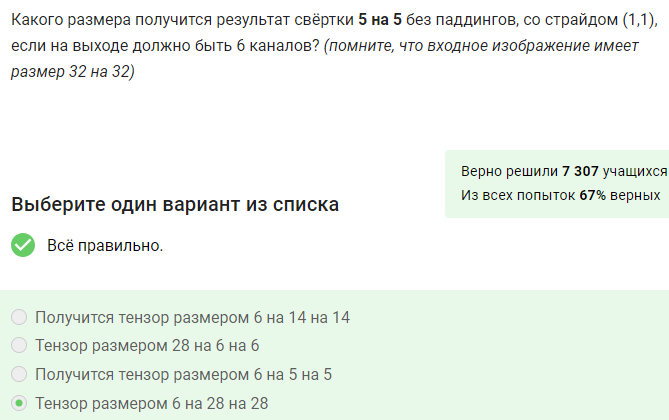

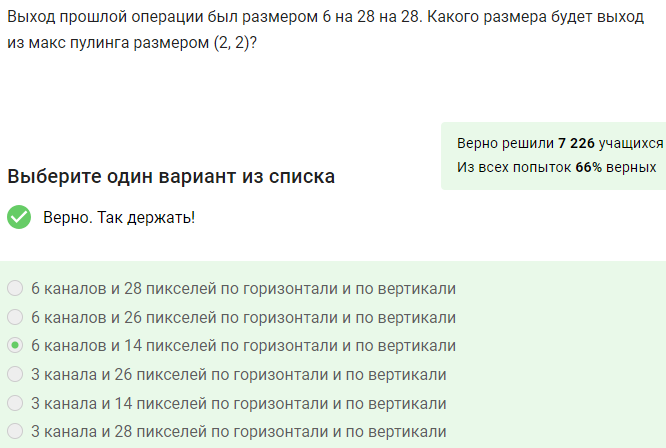

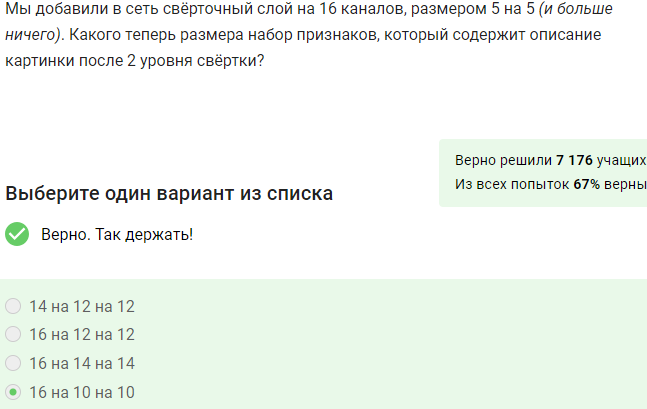

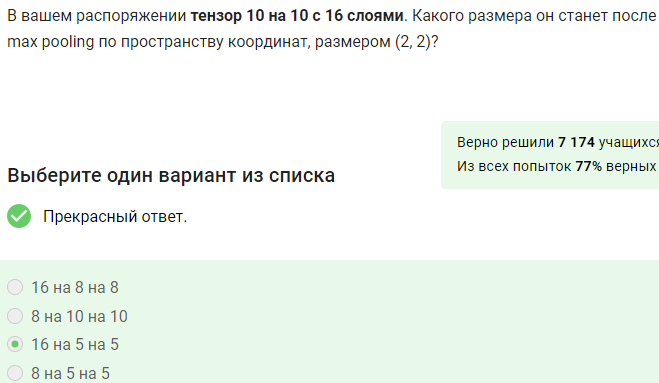

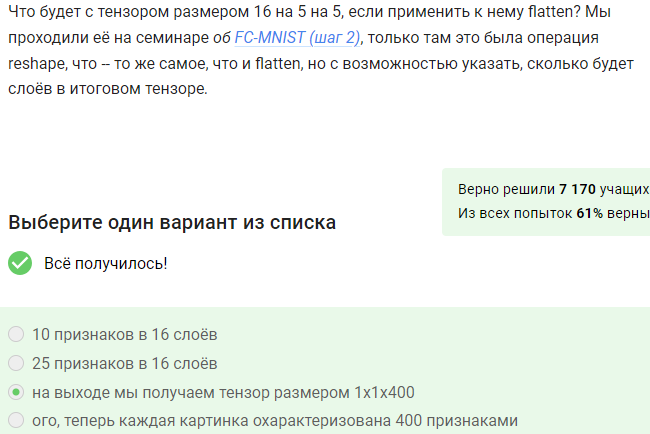

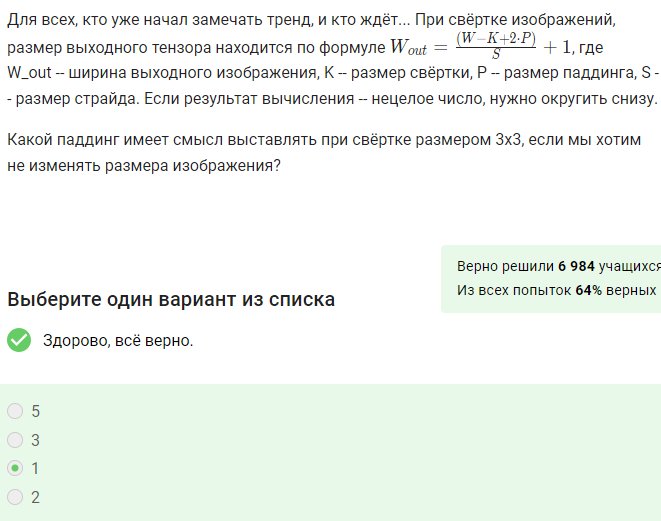

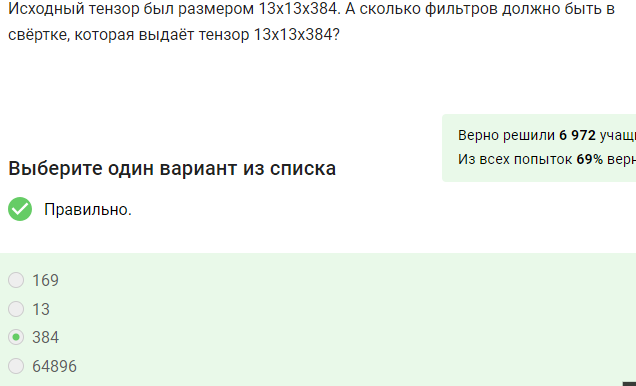

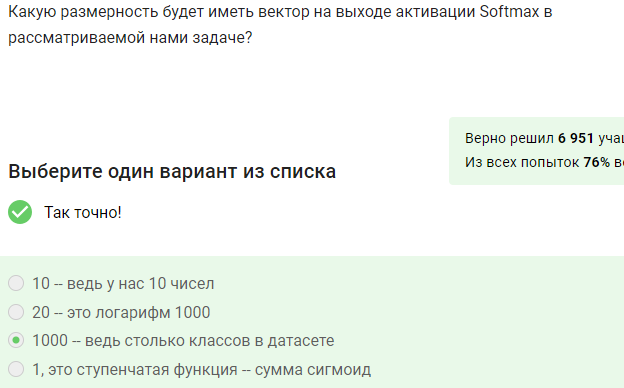

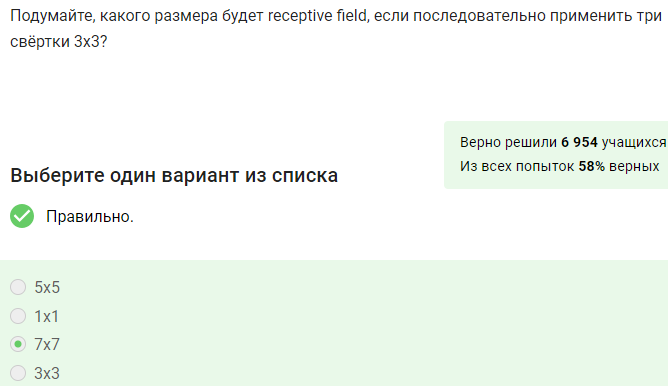

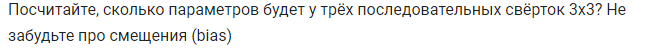

30

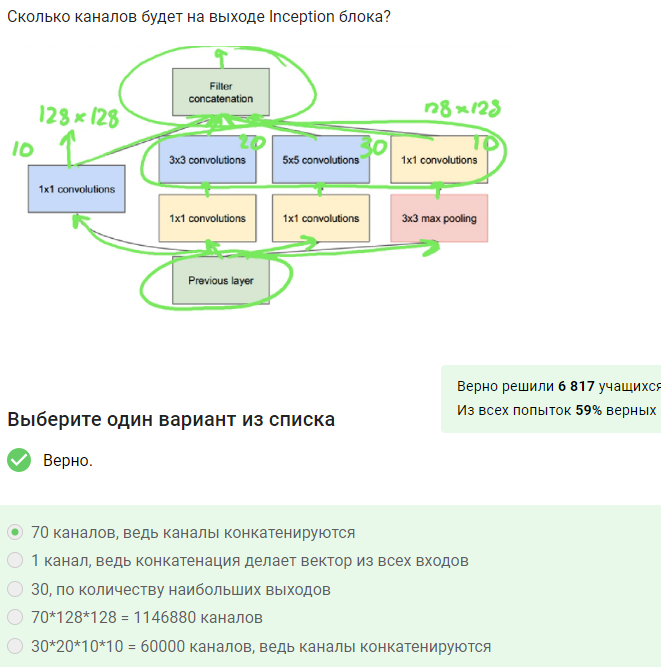

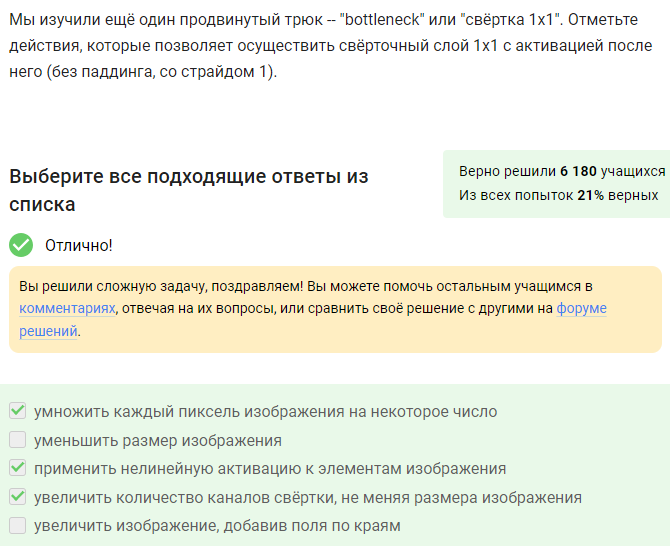

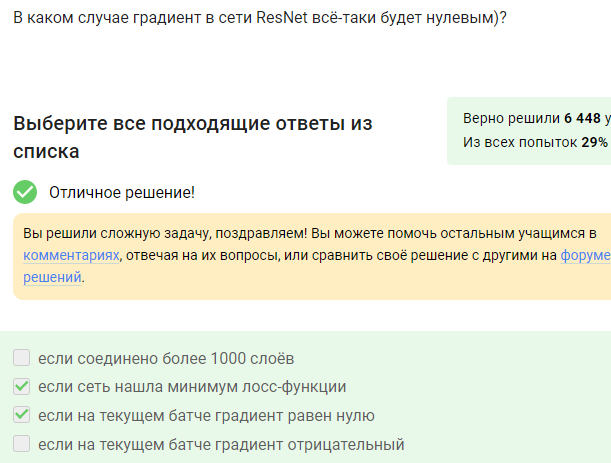

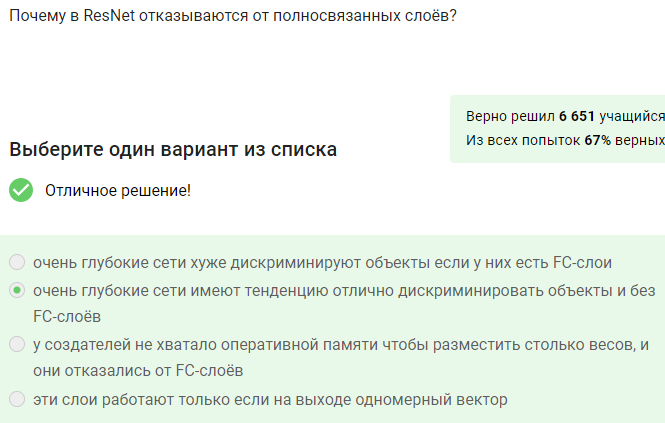

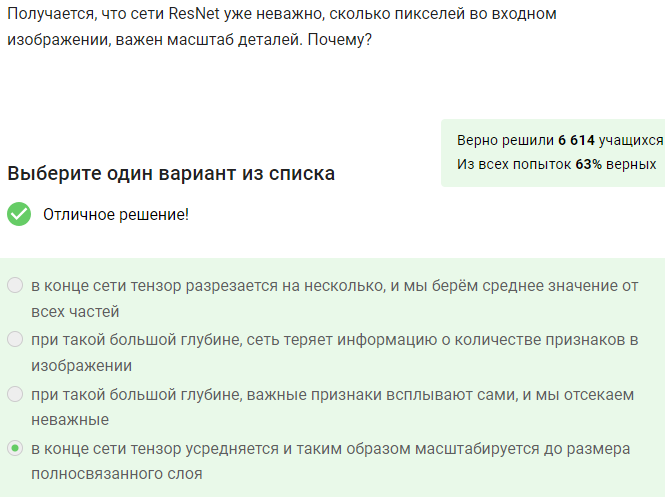

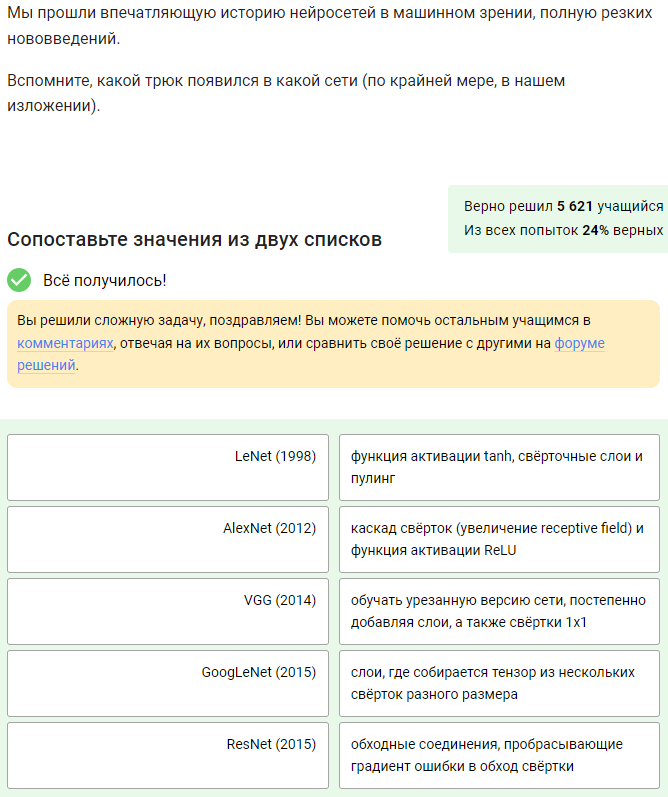

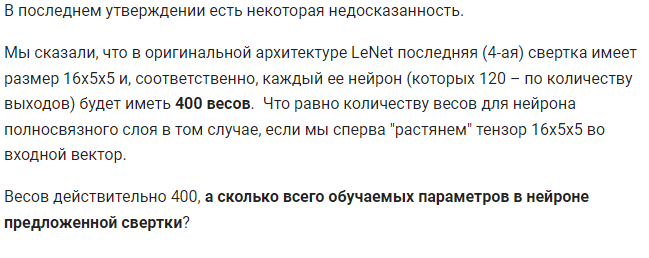

401

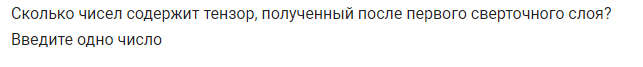

4704

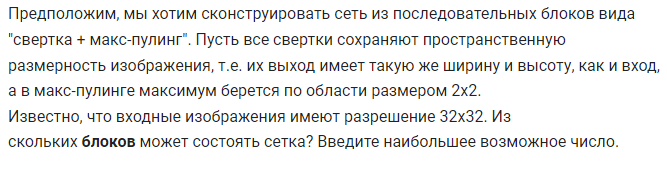

5

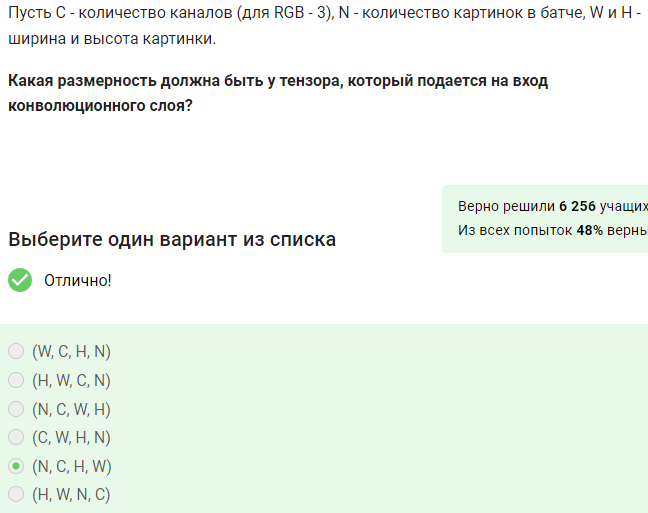

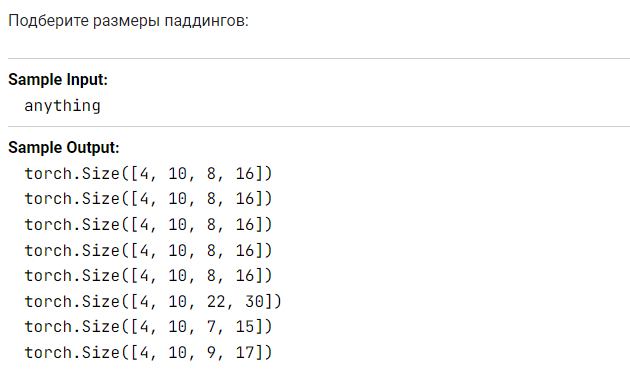

In [6]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)


out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)


out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)


out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)


out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1, 2))(x)


out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)


out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=(1, 1))(x)


out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=(1, 1))(x)


ModuleNotFoundError: No module named 'torch'

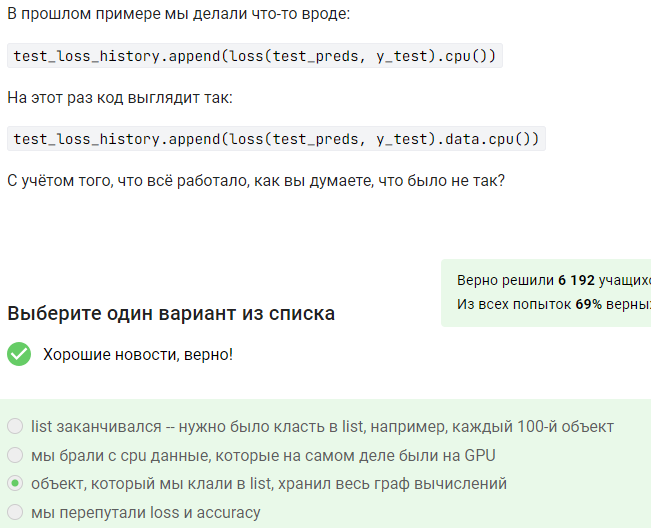

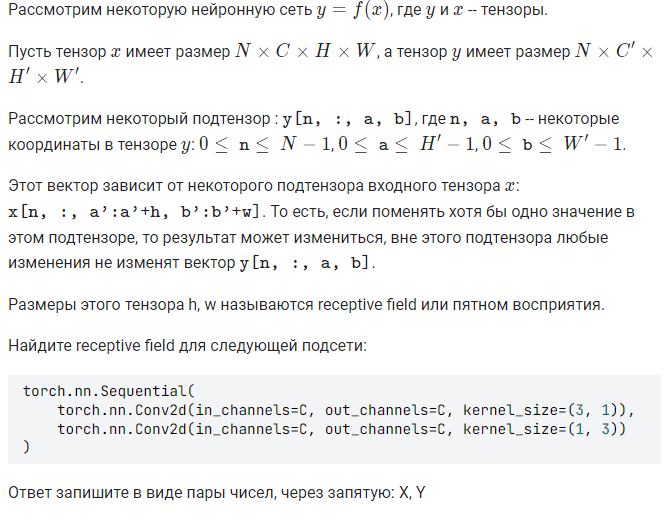

3, 3

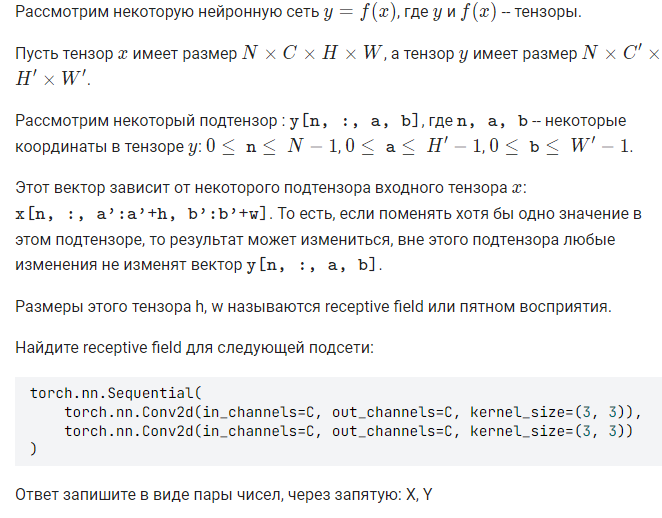

5,5

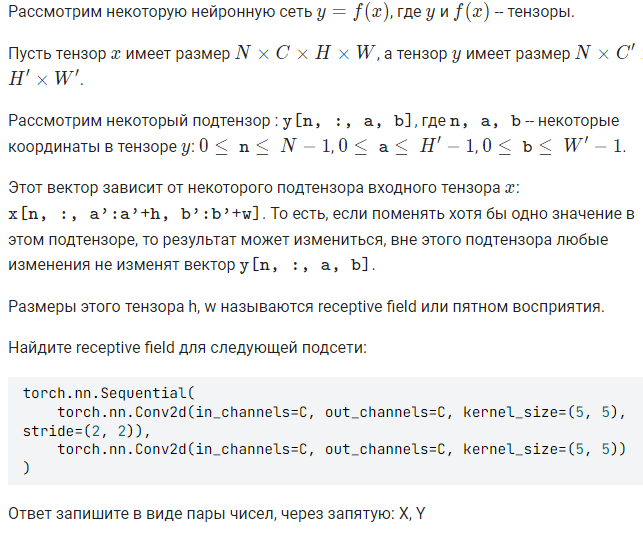

13,13

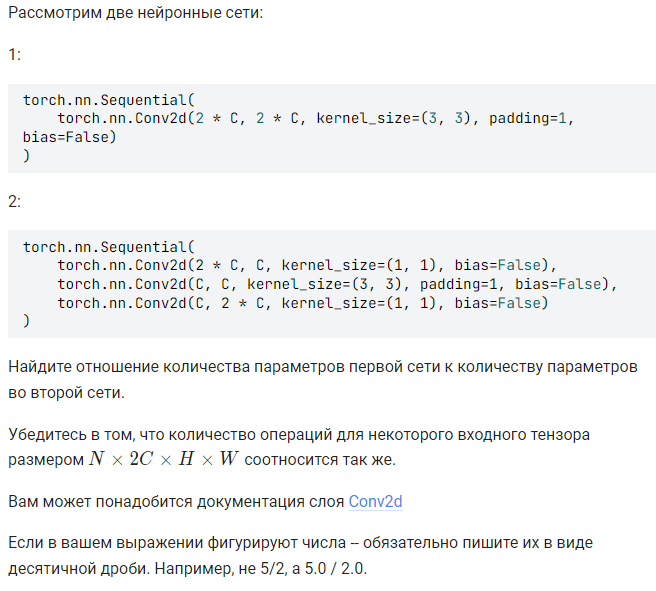

In [7]:
4*3*3/(2+9+2)

2.769230769230769

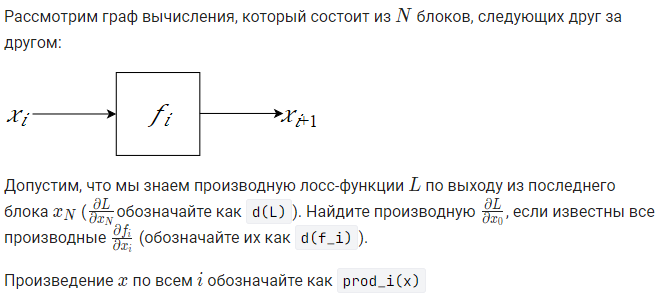

In [8]:
d(L)* prod_i(d(f_i))

NameError: name 'd' is not defined

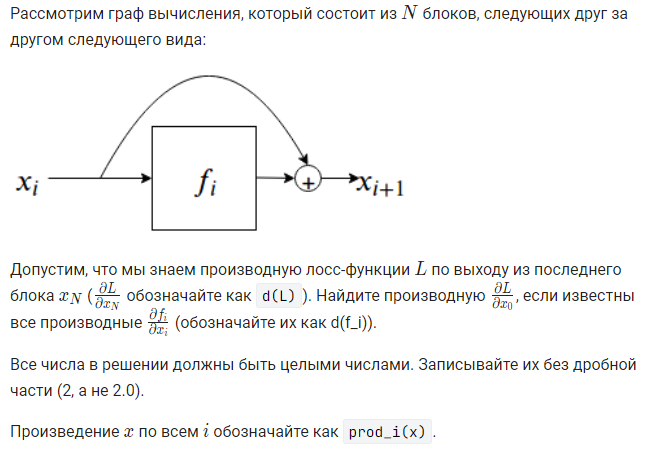

In [9]:
d(L)* prod_i(d(f_i)+1)

NameError: name 'd' is not defined

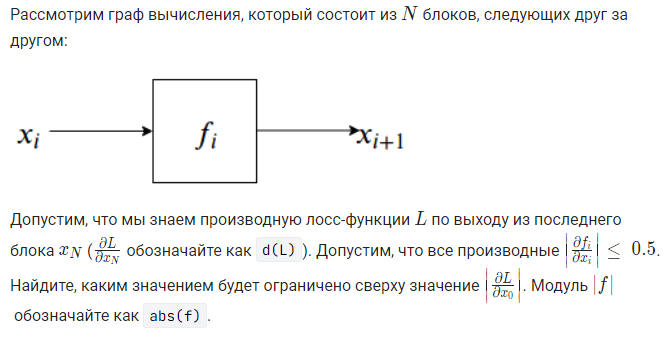

In [10]:
abs(d(L))*0.5**N

NameError: name 'd' is not defined

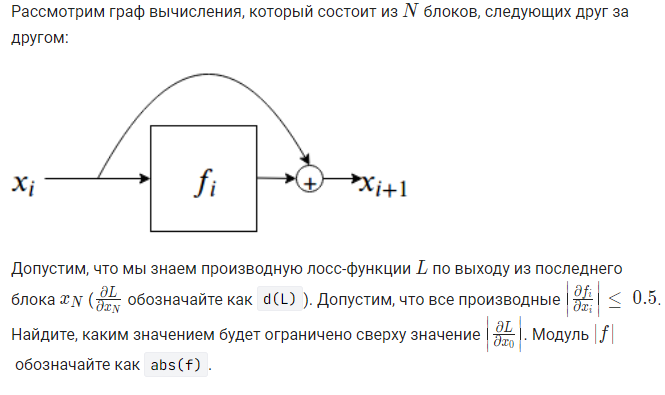

In [11]:
abs(d(L))*1.5**N

NameError: name 'd' is not defined

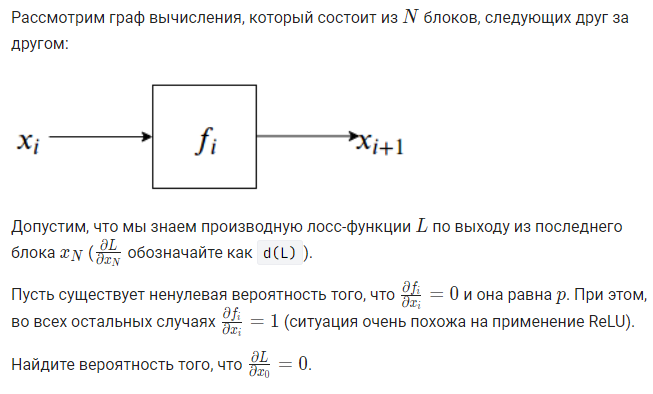

1-(1-p)^N

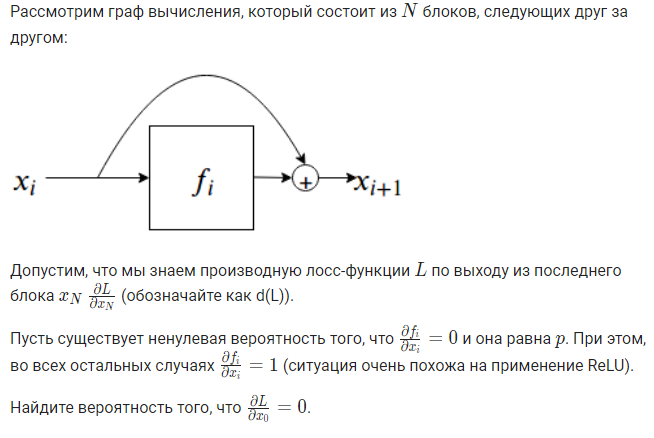

0